# Pulsar Emission Data Analysis

# All Imports that may or may not be needed and used for the notebook


In [1]:
#currently including any and all Imports that maybe needed for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from scipy import stats
import statistics
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat
from numpy import array
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from sklearn.datasets import load_iris
from sklearn import datasets, linear_model, metrics
from scipy.stats import binned_statistic

# Section for extracting from a tar file. #

##### Currently implemented for original TAR File structure.

In [2]:
#This is also found in the main file under tarunzip.py
import tarfile
import os
import sys

#tar = tarfile.open("pulseTarFile.tar")
#tar.extractall('./Data')
#tar.close()

In [3]:
#How to remove outlier data for these datasets.
#pulsar6npcleaned = pulsar6[(np.abs(stats.zscore(pulsar6["Brightness"])) <3)]
#pulsar6npcleaned

## Beginning of Exploration

### Examining the data

In this section we are determining the total integrity of the data to determine if further comprehensive data cleaning and uniforming processes are needed.

In [4]:
colnames = ['Pulse Number', 'Brightness', 'Uncertainty']
pulsar = pd.read_csv("Data/J1644-4559.pulses", sep = ' ', header = None, names = colnames)

In [5]:
pulsar.shape

(698, 3)

In [6]:
pulsar.head(25)

,Pulse Number,Brightness,Uncertainty
0,1,0.634671,0.002761
1,2,0.736945,0.005207
2,3,0.693834,0.002706
3,4,1.021866,0.010184
4,5,0.673845,0.006236
5,6,0.676883,0.004763
6,7,0.527039,0.002422
7,8,0.673417,0.003174
8,9,0.357076,0.002848
9,10,0.661704,0.005588


In [7]:
pulsar.describe()

,Pulse Number,Brightness,Uncertainty
count,698.00000,698.000000,698.000000
mean,349.50000,0.654319,0.004445
std,201.63953,0.163945,0.001855
min,1.00000,0.007642,0.002129
25%,175.25000,0.555267,0.003086
50%,349.50000,0.658295,0.003951
75%,523.75000,0.753396,0.005349
max,698.00000,1.159334,0.016097


In [8]:
nullBoolBrightness = pd.isnull(pulsar["Brightness"])

pulsar[nullBoolBrightness]

,Pulse Number,Brightness,Uncertainty


In [9]:
pulsar["Brightness"].describe()

count    698.000000
mean       0.654319
std        0.163945
min        0.007642
25%        0.555267
50%        0.658295
75%        0.753396
max        1.159334
Name: Brightness, dtype: float64

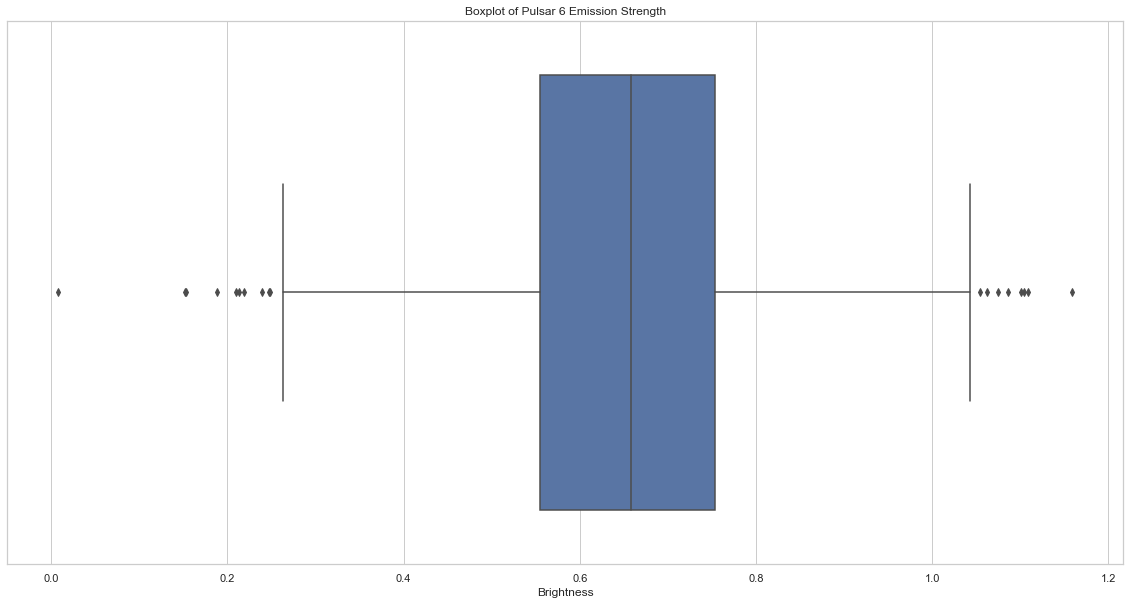

In [10]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

In [11]:
medianpulse6 = pulsar["Brightness"].median()
print("Median of Pulsar6: ", medianpulse6)
pulsar['Binary'] = np.where(pulsar['Brightness'] > medianpulse6, 1, 0)

Median of Pulsar6:  0.65829515


In [12]:
pulsar

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.634671,0.002761,0
1,2,0.736945,0.005207,1
2,3,0.693834,0.002706,1
3,4,1.021866,0.010184,1
4,5,0.673845,0.006236,1
...,...,...,...,...
693,694,0.776083,0.008928,1
694,695,0.625382,0.006018,0
695,696,0.647559,0.003765,0
696,697,0.312449,0.002901,0


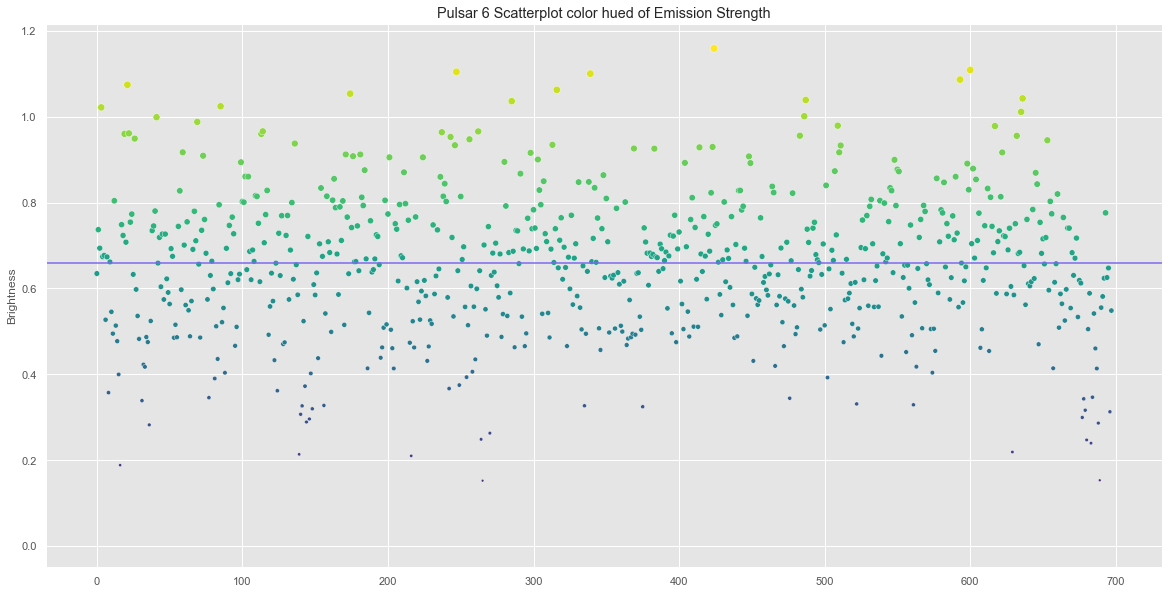

In [13]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')

In [14]:
print(len(pulsar[(pulsar.Brightness > 0.6589028)]))
print(len(pulsar[(pulsar.Brightness < 0.6589028)]))

348
350


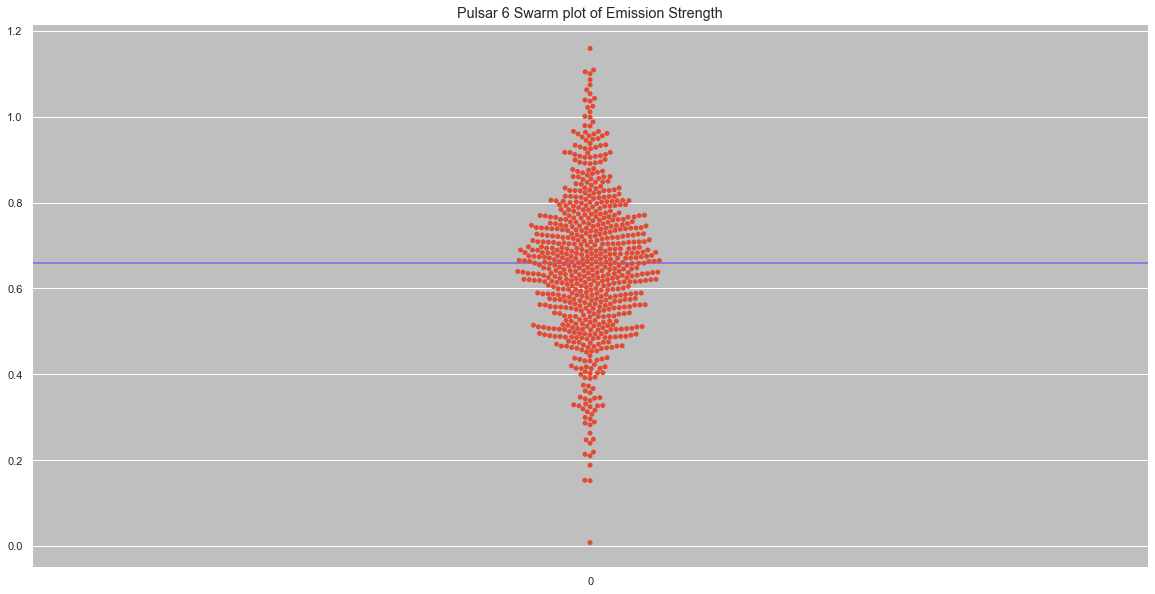

In [15]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar.Brightness.values
ax = plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=pulsar["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')


C:\Users\tajki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 Brightness')

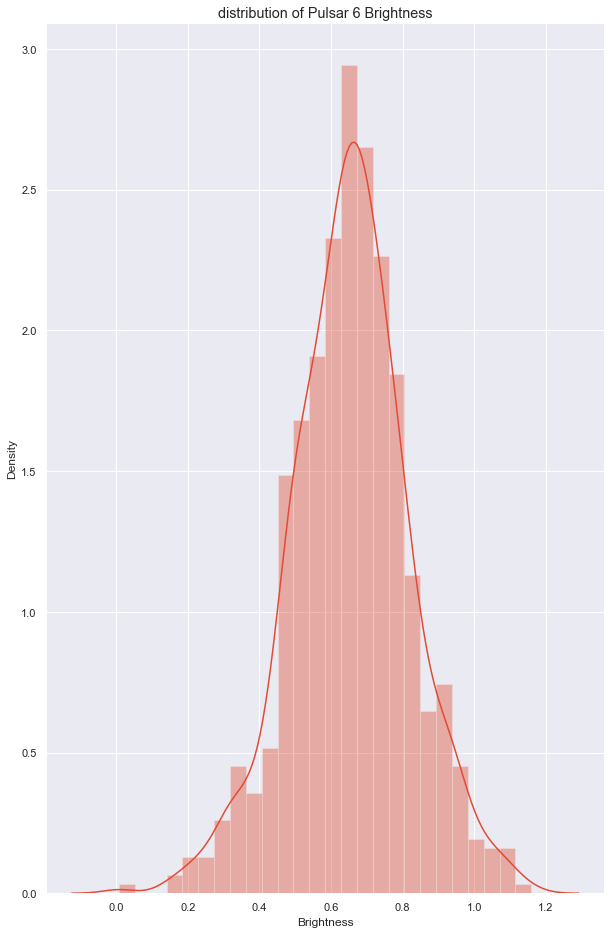

In [16]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar.Brightness)
plt.title("distribution of Pulsar 6 Brightness")

C:\Users\tajki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 binary assignments')

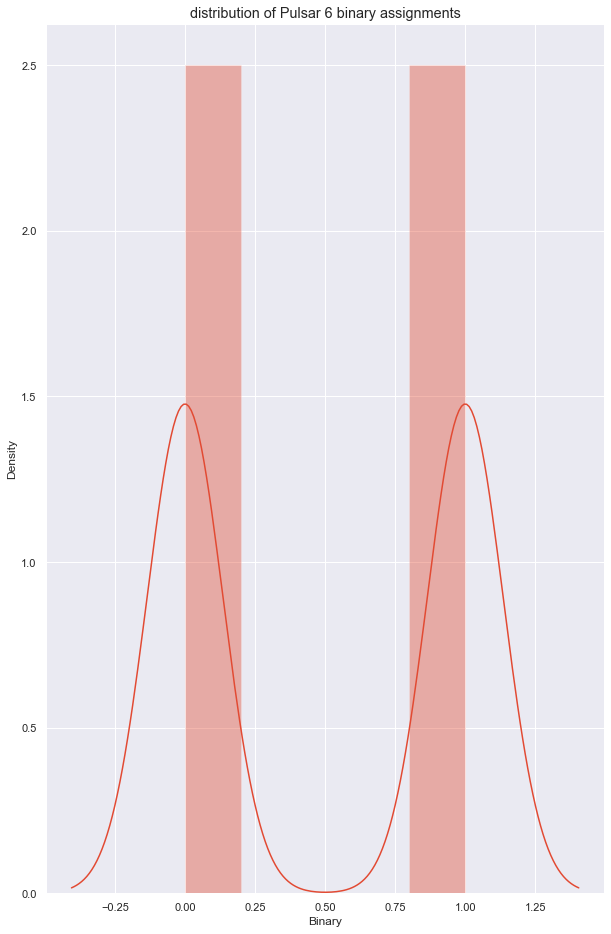

In [17]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar.Binary)
plt.title("distribution of Pulsar 6 binary assignments")

# Rolling Medians, Rolling Means, Binned Medians and Binned Mean analysis.


In [18]:
data = pulsar["Brightness"]
data

0      0.634671
1      0.736945
2      0.693834
3      1.021866
4      0.673845
         ...   
693    0.776083
694    0.625382
695    0.647559
696    0.312449
697    0.548353
Name: Brightness, Length: 698, dtype: float64

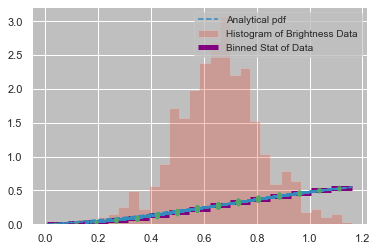

In [19]:
dataPDF = stats.maxwell.pdf(data)
bin_means, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='mean', bins=15)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure()
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, '--', label = "Analytical pdf")
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='purple', lw=5, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

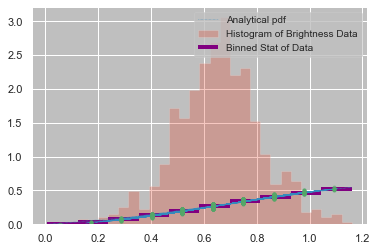

In [20]:
bin_median, bin_edges, binnumber = stats.binned_statistic(data, dataPDF,
        statistic='median', bins=10)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure()
plt.hist(data, bins=30, density=True, histtype='stepfilled', alpha=0.3, label='Histogram of Brightness Data')
plt.plot(data, dataPDF, ':', label = "Analytical pdf", lw=0.5)
plt.hlines(bin_median, bin_edges[:-1], bin_edges[1:], colors='purple', lw=4, label='Binned Stat of Data')
plt.plot((binnumber - 0.5) * bin_width, dataPDF, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

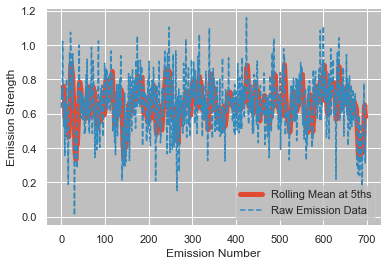

In [21]:
pulsar['RollingMeanEmissions5ths'] = pulsar["Brightness"].rolling(5).mean()

plt.plot(pulsar['RollingMeanEmissions5ths'], label="Rolling Mean at 5ths", lw=5)
plt.plot(pulsar['Brightness'], label= "Raw Emission Data", linestyle='--')
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

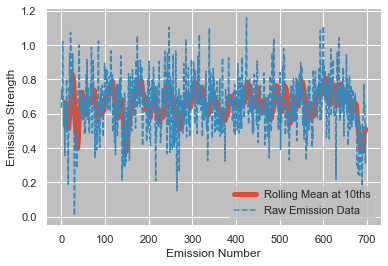

In [22]:
pulsar['RollingMeanEmissions10ths'] = pulsar["Brightness"].rolling(10).mean()

plt.plot(pulsar['RollingMeanEmissions10ths'], label="Rolling Mean at 10ths", lw=5)
plt.plot(pulsar['Brightness'], label= "Raw Emission Data", linestyle='--')
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

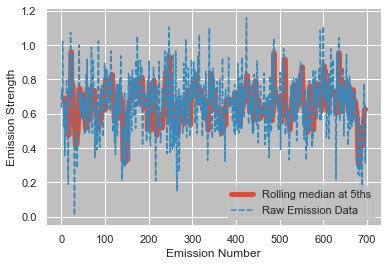

In [23]:
pulsar['RollingMedianEmissions5ths'] = pulsar["Brightness"].rolling(5).median()

plt.plot(pulsar['RollingMedianEmissions5ths'], label="Rolling median at 5ths", lw=5)
plt.plot(pulsar['Brightness'], label= "Raw Emission Data", linestyle='--')
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

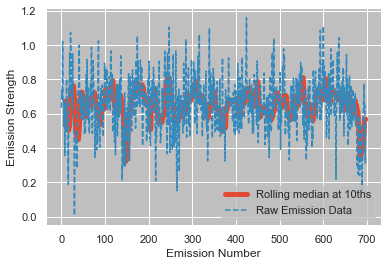

In [24]:
pulsar['RollingMedianEmissions10ths'] = pulsar["Brightness"].rolling(10).median()

plt.plot(pulsar['RollingMedianEmissions10ths'], label="Rolling median at 10ths", lw=5)
plt.plot(pulsar['Brightness'], label= "Raw Emission Data", linestyle='--')
plt.legend()
plt.ylabel('Emission Strength')
plt.xlabel('Emission Number')
plt.show()

In [25]:
pulsar.head(25)

,Pulse Number,Brightness,Uncertainty,Binary,RollingMeanEmissions5ths,RollingMeanEmissions10ths,RollingMedianEmissions5ths,RollingMedianEmissions10ths
0,1,0.634671,0.002761,0,NaN,NaN,NaN,NaN
1,2,0.736945,0.005207,1,NaN,NaN,NaN,NaN
2,3,0.693834,0.002706,1,NaN,NaN,NaN,NaN
3,4,1.021866,0.010184,1,NaN,NaN,NaN,NaN
4,5,0.673845,0.006236,1,0.752232,NaN,0.693834,NaN
5,6,0.676883,0.004763,1,0.760675,NaN,0.693834,NaN
6,7,0.527039,0.002422,0,0.718693,NaN,0.676883,NaN
7,8,0.673417,0.003174,1,0.714610,NaN,0.673845,NaN
8,9,0.357076,0.002848,0,0.581652,NaN,0.673417,NaN
9,10,0.661704,0.005588,1,0.579224,0.665728,0.661704,0.673631


# Kalman Filter to go here


## Binary Classification

In [26]:
X = pulsar[['Brightness', 'Uncertainty']]
y = pulsar['Binary']

In [27]:
X.head()

,Brightness,Uncertainty
0,0.634671,0.002761
1,0.736945,0.005207
2,0.693834,0.002706
3,1.021866,0.010184
4,0.673845,0.006236


In [28]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Binary, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)

In [30]:
from sklearn.preprocessing import StandardScaler

train_scaler = StandardScaler()
X_train = train_scaler.fit_transform(X_train)

test_scaler = StandardScaler()
X_test = test_scaler.fit_transform(X_test)

In [31]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [32]:
predictions = model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  67
False Positive(FP) =  0
True Negative(TN)  =  71
False Negative(FN) =  2


In [34]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print("Accuracy of the model is ", accuracy)

Accuracy of the model is  0.9857142857142858


## Bidirectional LSTM Model

In [35]:
# making a list with the brightness and uncertainty values
values_list = pulsar[['Brightness', 'Uncertainty']].values.tolist()
values_list[:10]

[[0.6346714, 0.002760888],
 [0.7369454, 0.005207055],
 [0.6938341, 0.0027059],
 [1.021866, 0.01018372],
 [0.6738453, 0.006235539],
 [0.6768825, 0.004762893],
 [0.5270392, 0.002422239],
 [0.6734173, 0.003174072],
 [0.3570756, 0.00284815],
 [0.6617037, 0.005587867]]

In [36]:
from sklearn import preprocessing

# normalizing the values
values_list = preprocessing.normalize(values_list)

In [37]:
# function for spliting  list in a format we can use in the model
def split_list(blist, steps):
    X, y = list(), list()
    for i in range(len(blist)):        
        end_ix = i + steps
        if end_ix > len(blist)-1:
            break    
        list_x, list_y = blist[i:end_ix], blist[end_ix][0]
        X.append(list_x)
        y.append(list_y)
    return array(X), array(y)

In [38]:
# splitting the list
X, y = split_list(values_list, 100)

# reshaping the list to feed the model
X = X.reshape((X.shape[0], X.shape[1], 2))

In [39]:
# splitting the list into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)

In [40]:
# setting the parameters for the lstm model and compiling it
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(100, 2)))
model.add(Dense(25, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
# training the model
history = model.fit(X_train, y_train, epochs=50, verbose=1, batch_size=(int(X_train.shape[0]/50)))

Epoch 1/50
54/54 [==============================] - 6s 41ms/step - loss: 0.6672 - accuracy: 0.0000e+00
Epoch 2/50
54/54 [==============================] - 2s 41ms/step - loss: 147.9319 - accuracy: 0.0000e+00
Epoch 3/50
54/54 [==============================] - 2s 40ms/step - loss: 0.3789 - accuracy: 0.0000e+00
Epoch 4/50
54/54 [==============================] - 2s 41ms/step - loss: 0.3077 - accuracy: 0.0000e+00
Epoch 5/50
54/54 [==============================] - 2s 41ms/step - loss: 0.2549 - accuracy: 0.0000e+00
Epoch 6/50
54/54 [==============================] - 2s 40ms/step - loss: 0.2139 - accuracy: 0.0000e+00
Epoch 7/50
54/54 [==============================] - 2s 41ms/step - loss: 0.1816 - accuracy: 0.0000e+00
Epoch 8/50
54/54 [==============================] - 2s 41ms/step - loss: 0.1556 - accuracy: 0.0000e+00
Epoch 9/50
54/54 [==============================] - 2s 40ms/step - loss: 0.1344 - accuracy: 0.0000e+00
Epoch 10/50
54/54 [==============================] - 2s 41ms/step - los

In [42]:
# predicting the y/brightness values for the test set
y_pred = model.predict(X_test, verbose=0)
y_pred[:10]

array([[0.99742967],
       [0.9974283 ],
       [0.99742913],
       [0.9974295 ],
       [0.99742895],
       [0.9974301 ],
       [0.99742985],
       [0.99742836],
       [0.9974307 ],
       [0.99742925]], dtype=float32)

In [43]:
# evaluating the model
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 12ms/step - loss: 0.0027 - accuracy: 0.0000e+00


[0.0027466383762657642, 0.0]

## ML Evaluation.

### Logistic Regression

This model appears to have gained some insight in the data and accurately defined a majority of the data. The accuracy of the model is >95% which indicates that it was able to determine a trend and apply it in a useful manner in the predictions during evaluation. Further, the confusion matrix further supports the high accuracy and likely usefulness of the model with only 3 false assignments. However, in analysis this is only to determine if there is a correlation between binary assignment and the emission strength x error in measurement. This doesn't aid us in our overall randomness determination, but it does determine that uncertainty has a role in the binary assignment and the overall trust of emission strength.

### Bidirectional LSTM

This model is very error prone as the loss value is consistently at 60& or higher at every epoch during training and at exactly 63.07% in evaluation with a 0% accuracy this indicates that there is either a great error in the formation of the model, data used or trend being obtained. Alternatively it could indicate that there is no trend there to predict. Likely this indicates that the model is not valuable for any meaningful analysis.

# Preliminary runs test
### Math Logic

$$ Z = {R - \tilde{R} \over s_{R}} $$

$$ \tilde{R} = {2_{n1 n2} \over n1 + n2} + 1 $$

$$  s^2_{R} = {2_{n1n2}(2{n1n2-n1-n2}) \over (n1+n2)^2(n1+n2-1) }$$

link to resource: https://www.geeksforgeeks.org/runs-test-of-randomness-in-python/

$ Z_{critical} = 1.96 $ as the confidence interval level of 95% thus this is a 2 tailed test. If the probability as corrosponding to this confidence interval $ H_{null} $ will be rejected as it is not statistically significant as denoted by $|Z| > Z_{critical} $

There is also code attempting to change it from a z-score probability to a P-score for ease of understanding and clarity.

# FUNCTION CODE FOR RUNS TEST

In [44]:
binaryData1 = pulsar['Binary'].tolist()
print("pulsar6 original: ",binaryData1)

pulsar6 original:  [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,




# Below we begin autocorrelation and autocovariance analysis

To get started with this I am playing around with guide from: https://towardsdatascience.com/a-step-by-step-guide-to-calculating-autocorrelation-and-partial-autocorrelation-8c4342b784e8

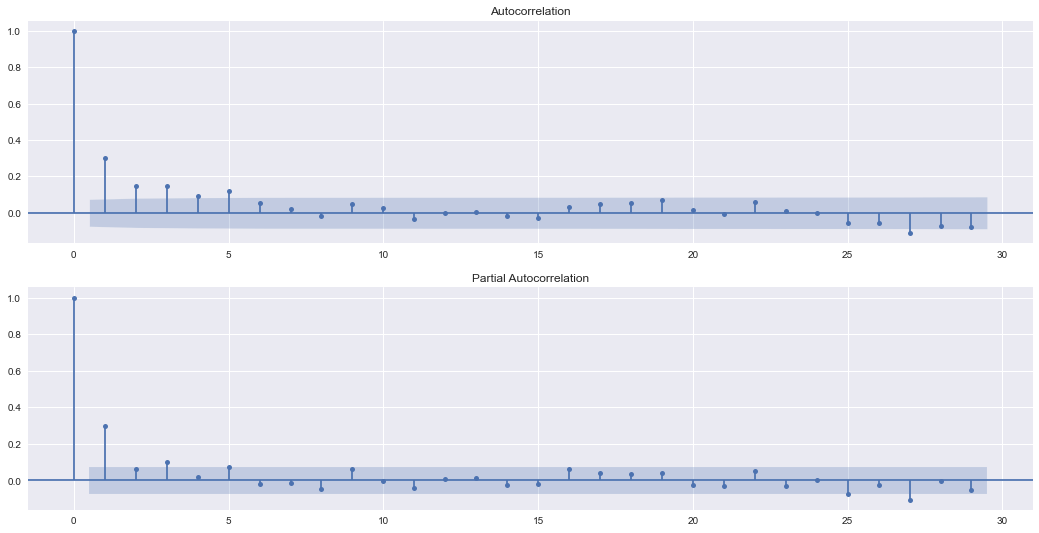

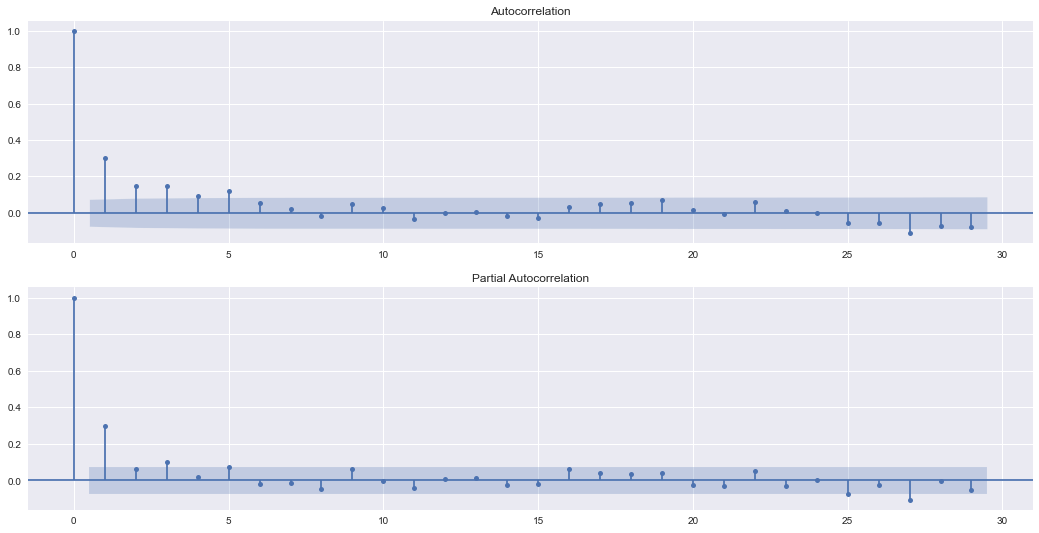

In [45]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar['Brightness'], ax=ax[0])
plot_pacf(pulsar['Brightness'], ax=ax[1], method="ols")

In [46]:
acf(pulsar['Brightness'], nlags=10)

C:\Users\tajki\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.29929122,  0.14656878,  0.14948301,  0.09384681,
        0.11707783,  0.05493324,  0.02160374, -0.01711482,  0.04777   ,
        0.02563995])

In [47]:
acfpulsar = pd.DataFrame()
for lag in range(0,11):
    acfpulsar[f"B_lag_{lag}"] = pulsar['Brightness'].shift(lag)


acfpulsar

,B_lag_0,B_lag_1,B_lag_2,B_lag_3,B_lag_4,B_lag_5,B_lag_6,B_lag_7,B_lag_8,B_lag_9,B_lag_10
0,0.634671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.736945,0.634671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.693834,0.736945,0.634671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.021866,0.693834,0.736945,0.634671,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.673845,1.021866,0.693834,0.736945,0.634671,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
693,0.776083,0.623757,0.581248,0.555266,0.152886,0.286132,0.413354,0.460095,0.541486,0.346502,0.239302
694,0.625382,0.776083,0.623757,0.581248,0.555266,0.152886,0.286132,0.413354,0.460095,0.541486,0.346502
695,0.647559,0.625382,0.776083,0.623757,0.581248,0.555266,0.152886,0.286132,0.413354,0.460095,0.541486
696,0.312449,0.647559,0.625382,0.776083,0.623757,0.581248,0.555266,0.152886,0.286132,0.413354,0.460095


In [48]:
acfpulsar.corr()["B_lag_0"].values

array([ 1.        ,  0.29938402,  0.14710414,  0.15003691,  0.09455452,
        0.11800036,  0.05537751,  0.02179885, -0.01724535,  0.04863954,
        0.02621294])

### Getting every 5th as per the auto correlation
### Creating a new set of discrete 100 sets and examining them specifically
### Further Random testing to move into extensive testing

#### Getting every 5th as per the auto correlation

In [49]:
held5ths = pulsar[pulsar.index % 5 == 0]
held5ths

,Pulse Number,Brightness,Uncertainty,Binary,RollingMeanEmissions5ths,RollingMeanEmissions10ths,RollingMedianEmissions5ths,RollingMedianEmissions10ths
0,1,0.634671,0.002761,0,NaN,NaN,NaN,NaN
5,6,0.676883,0.004763,1,0.760675,NaN,0.693834,NaN
10,11,0.545564,0.003835,0,0.552960,0.656817,0.545564,0.673631
15,16,0.399571,0.004712,0,0.537775,0.545367,0.494655,0.520201
20,21,0.707715,0.006011,1,0.665593,0.601684,0.723437,0.610538
...,...,...,...,...,...,...,...,...
675,676,0.618826,0.002507,0,0.634092,0.648694,0.630414,0.650434
680,681,0.246916,0.004276,0,0.363455,0.498773,0.316197,0.572860
685,686,0.541486,0.003149,0,0.444185,0.403820,0.505084,0.344559
690,691,0.555266,0.003657,0,0.373547,0.408866,0.413354,0.436725


In [50]:
medianheld5ths = held5ths["Brightness"].median()
medianheld5ths

0.6508051

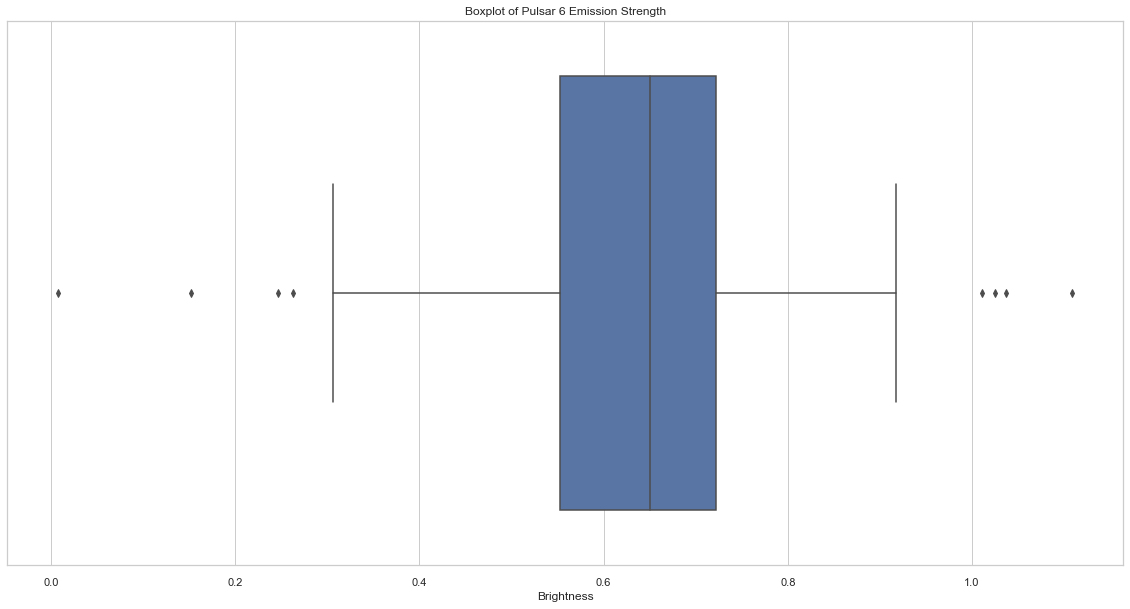

In [51]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held5ths["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

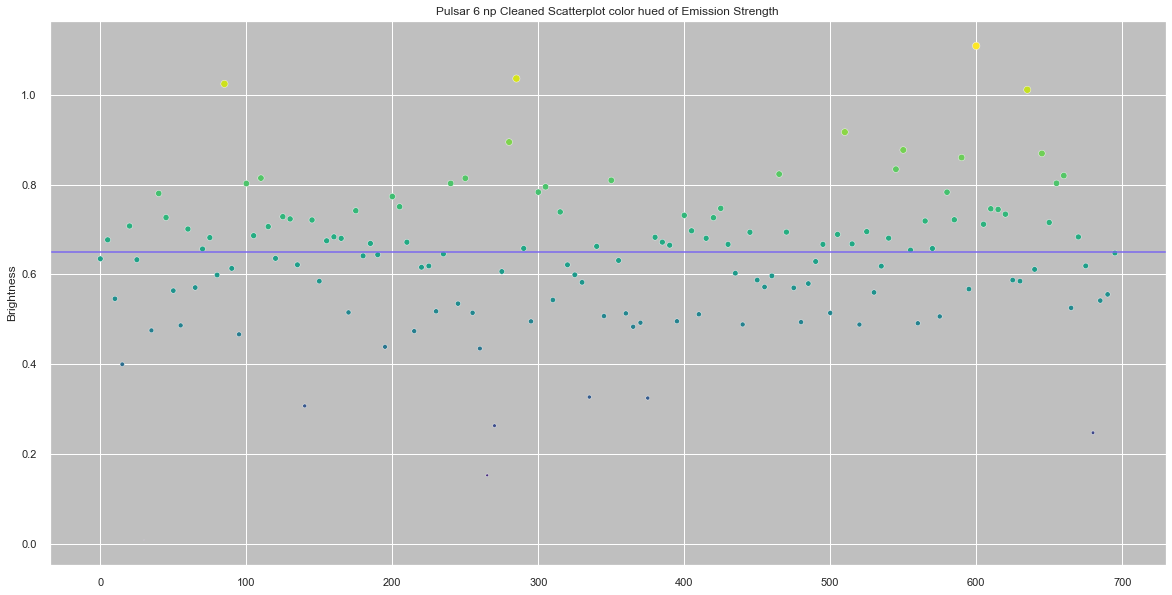

In [52]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = sns.scatterplot(data=held5ths["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')

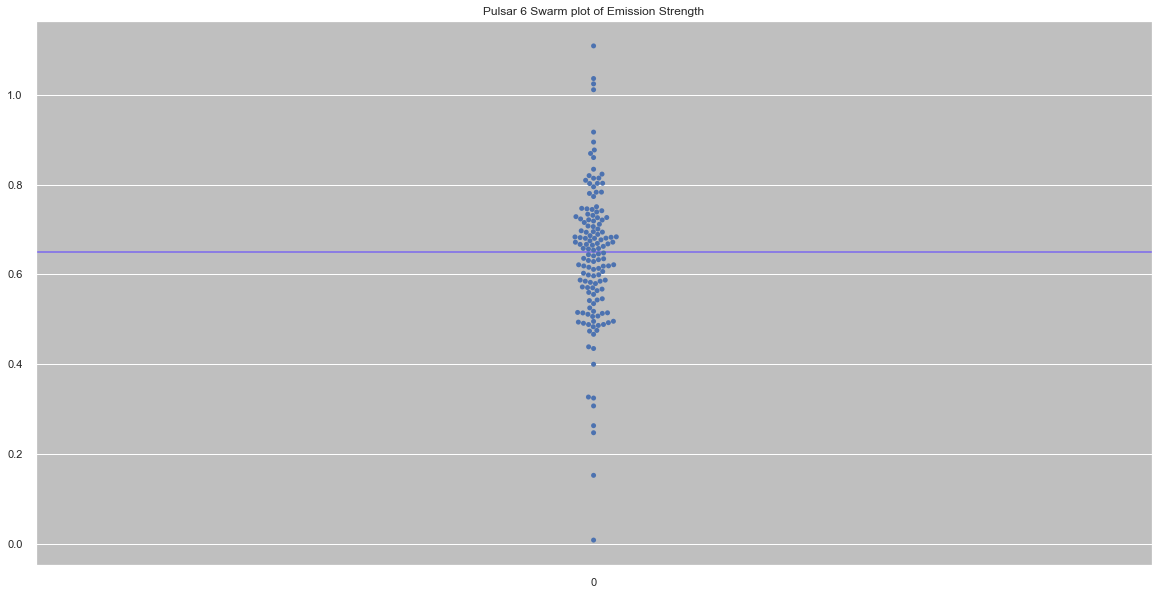

In [53]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=held5ths["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [54]:
print(len(held5ths[(held5ths.Brightness > 0.6508051)]))
print(len(held5ths[(held5ths.Brightness < 0.6508051)]))

70
70


#### Randomness testing

In [55]:
np.savetxt(r'every5thbinarypulsar6.txt', held5ths.Binary, fmt='%d', delimiter='')
np.savetxt(r'allpulsar6.txt', pulsar.Binary, fmt='%d', delimiter='')

In [56]:
pulsar.Binary

0      0
1      1
2      1
3      1
4      1
      ..
693    1
694    0
695    0
696    0
697    0
Name: Binary, Length: 698, dtype: int32